## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [1]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'
slashers = pd.read_csv(data_url)

###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [2]:
slashers.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [3]:
print(slashers['Gender'].value_counts())
print(slashers['Gender'].value_counts()/len(slashers))

0    263
1    222
Name: Gender, dtype: int64
0    0.542268
1    0.457732
Name: Gender, dtype: float64


Describe your results here.
- Of the 485 characters in slasher films, 54% are female.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

82% of the characters in slasher films do not survive.

In [4]:
print(slashers['Survival'].value_counts())
print(slashers['Survival'].value_counts()/len(slashers))

0    400
1     85
Name: Survival, dtype: int64
0    0.824742
1    0.175258
Name: Survival, dtype: float64


In [5]:
deaths_per_movie = slashers['Survival'].value_counts()[0]/50
print('There was an average of',deaths_per_movie,'deaths per Slasher movie.')

There was an average of 8.0 deaths per Slasher movie.


###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [6]:
pd.crosstab(slashers['Gender'],slashers['Survival'], margins=True)

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


Describe your results here.
- Women die more often, and men survive more often, but the difference is not that strong.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [7]:
pd.crosstab(slashers['Gender'],slashers['Survival'], margins=True, normalize='index')

Survival,0,1
Gender,,
0,0.866920,0.133080
1,0.774775,0.225225
All,0.824742,0.175258


Describe your results here.
- 87% of women die, while 77% of men die.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no relationship between Survival and Gender.

**Ha:** There is a relationship between Survival and Gender.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [8]:
# For comparison with the expected values
pd.crosstab(slashers['Gender'],slashers['Survival'])

Survival,0,1
Gender,,
0,228,35
1,172,50


In [9]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(slashers['Gender'],slashers['Survival']))

(6.448486105276048,
 0.011104692591139975,
 1,
 array([[216.90721649,  46.09278351],
        [183.09278351,  38.90721649]]))

### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

Describe your results in a sentence or two.
- A chi squared test was performed on Gender vs Survival Rate in North American Slasher movies. Women are more likely to die than men (p-value = 0.011).

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

In [10]:

survival = pd.crosstab(slashers['Gender'],slashers['Survival'],normalize='index')
survival[0]

Gender
0    0.866920
1    0.774775
Name: 0, dtype: float64

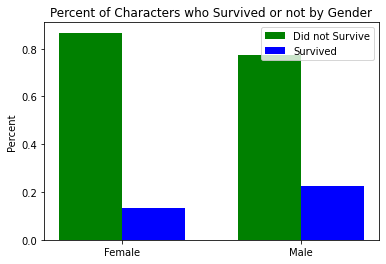

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Need this for graphing purposes - it's the number of passenger classes
N = 2 ## Fill in here 

survival = pd.crosstab(slashers['Gender'],slashers['Survival'],normalize='index')

Died = survival[0] # Percent that died in each gender
Survived = survival[1] #Percent that survived in each gender

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percent of Characters who Survived or not by Gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female','Male'))

ax.legend((rects1[0], rects2[0]), ('Did not Survive', 'Survived'))
plt.show()

Sum up your results in a sentence or two.

In [16]:
# My wife wants to know if men or women were more likely to have sex.
pd.crosstab(slashers['Gender'],slashers['Activity'],normalize='index', margins=True)

Activity,0,1
Gender,,
0,0.718631,0.281369
1,0.626126,0.373874
All,0.676289,0.323711


In [13]:
chi2_contingency(pd.crosstab(slashers['Gender'],slashers['Activity']))

(4.292461309495354,
 0.03828170852806776,
 1,
 array([[177.86391753,  85.13608247],
        [150.13608247,  71.86391753]]))

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [14]:

women = slashers[slashers['Gender'] == 0]
men = slashers[slashers['Gender'] == 1]
print(pd.crosstab(women['Activity'],women['Survival'],normalize='index'))
print(pd.crosstab(men['Activity'],men['Survival'],normalize='index'))

print(chi2_contingency(pd.crosstab(women['Activity'],women['Survival'],normalize='index')))
print(chi2_contingency(pd.crosstab(men['Activity'],men['Survival'],normalize='index')))

Survival         0         1
Activity                    
0         0.851852  0.148148
1         0.905405  0.094595
Survival         0         1
Activity                    
0         0.719424  0.280576
1         0.867470  0.132530
(4.199914847886026, 0.04042600923338359, 1, array([[0.87862863, 0.12137137],
       [0.87862863, 0.12137137]]))
(2.2143880241580836, 0.1367292711158149, 1, array([[0.79344717, 0.20655283],
       [0.79344717, 0.20655283]]))


Women who are sexually active in slasher movies are 5% more likely to die (p = 0.04). However men who are sexually active, are 14% more likely to die (p = 0.14).

What I don't understand is why the p-value is weaker despite having a stronger effect size.

In [15]:
import statsmodels.api as sm
women = slashers[slashers['Gender'] == 0]
men = slashers[slashers['Gender'] == 1]


t22 = sm.stats.Table2x2(pd.crosstab(women['Activity'],women['Survival']))
print(t22.summary())

t22 = sm.stats.Table2x2(pd.crosstab(men['Activity'],men['Survival']))
print(t22.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


               Estimate   SE   LCB    UCB  p-value
--------------------------------------------------
Odds ratio        0.601        0.250 1.442   0.254
Log odds ratio   -0.510 0.447 -1.385 0.366   0.254
Risk ratio        0.941        0.856 1.034   0.207
Log risk ratio   -0.061 0.048 -0.156 0.034   0.207
--------------------------------------------------
               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        0.392        0.188  0.817   0.012
Log odds ratio   -0.937 0.375 -1.672 -0.203   0.012
Risk ratio        0.829        0.726  0.948   0.006
Log risk ratio   -0.187 0.068 -0.321 -0.054   0.006
---------------------------------------------------


Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.